In [44]:
#Haven't used ChatGPT
import pandas as pd

In [5]:
#1

df = pd.read_csv('/content/random_students.csv')
df.head(5)

,Full_Name,Type,Gender,Test_1,Test_2,Test_3,Assignment_1,Assignment_2,Assignment_3,Quiz_1,Quiz_2,Quiz_3
0,BB-8,Good,U,73,78.0,98,60.0,85,82,92,65.0,78
1,Grand Moff Tarkin,Bad,M,68,82.0,95,89.0,88,96,60,70.0,64
2,Kylo Ren,Good,M,90,99.0,94,68.0,81,99,92,65.0,91
3,Luke Skywalker,Good,M,72,78.0,61,96.0,68,97,61,85.0,98
4,Jabba the Hutt,Bad,M,93,NaN,89,85.0,83,64,77,NaN,96


In [6]:
#2
len(df)

29

In [7]:
#3
df.describe()

,Test_1,Test_2,Test_3,Assignment_1,Assignment_2,Assignment_3,Quiz_1,Quiz_2,Quiz_3
count,29.000000,28.000000,29.000000,28.000000,29.000000,29.000000,29.000000,28.000000,29.000000
mean,78.344828,83.535714,77.827586,79.107143,79.206897,84.724138,79.551724,80.357143,80.482759
std,12.057232,11.650726,13.747906,11.967051,10.283063,12.085696,11.870089,12.924895,11.366054
min,63.000000,64.000000,60.000000,60.000000,63.000000,60.000000,60.000000,61.000000,61.000000
25%,68.000000,75.500000,66.000000,68.750000,71.000000,76.000000,69.000000,66.750000,72.000000
50%,77.000000,83.000000,74.000000,83.000000,80.000000,86.000000,81.000000,80.000000,80.000000
75%,89.000000,94.250000,94.000000,88.250000,86.000000,96.000000,90.000000,89.500000,91.000000
max,100.000000,99.000000,100.000000,97.000000,99.000000,100.000000,99.000000,100.000000,98.000000


In [9]:
#4
df[(df['Test_1'] > 80) & (df['Gender'] == 'F')]

,Full_Name,Type,Gender,Test_1,Test_2,Test_3,Assignment_1,Assignment_2,Assignment_3,Quiz_1,Quiz_2,Quiz_3
12,Nute Gunray,Bad,F,98,76.0,64,NaN,69,99,65,62.0,72
18,Rey,Good,F,100,94.0,71,65.0,75,99,74,70.0,80


In [11]:
#5
print(df['Test_1'].mean(), df['Test_2'].mean(), df['Test_3'].mean())

78.34482758620689 83.53571428571429 77.82758620689656


In [19]:
#6
print(df.isnull().values.any())
df = df.fillna(0)
print(df.isnull().values.any())

True
False


<Axes: xlabel='Type', ylabel='Test_1'>

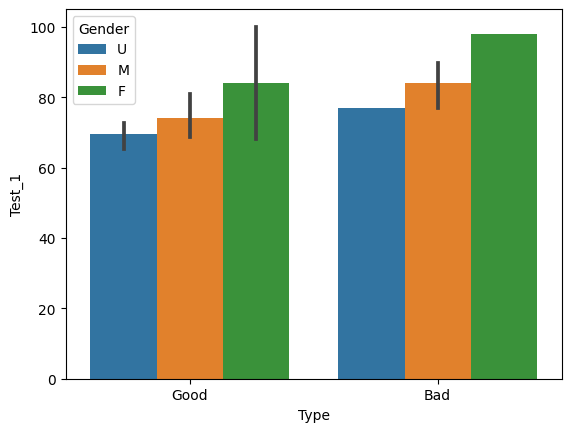

In [20]:
#7
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Type', y='Test_1', hue='Gender', data=df)


In [29]:
#8
df['Final_Grade'] = df[['Test_1', 'Test_2', 'Test_3', 'Assignment_1', 'Assignment_2', 'Assignment_3', 'Quiz_1', 'Quiz_2', 'Quiz_3']].mean(axis=1)
highest_grade_student = df.loc[df['Final_Grade'].idxmax()]
print(highest_grade_student)

Full_Name            Yoda
Type                 Good
Gender                  M
Test_1                 79
Test_2               77.0
Test_3                100
Assignment_1         97.0
Assignment_2           65
Assignment_3          100
Quiz_1                 80
Quiz_2               91.0
Quiz_3                 98
Final_Grade     87.444444
Name: 23, dtype: object


<ipython-input-40-0229f5567064>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages = df.groupby('Gender').mean()


<Axes: xlabel='Gender', ylabel='Final_Grade'>

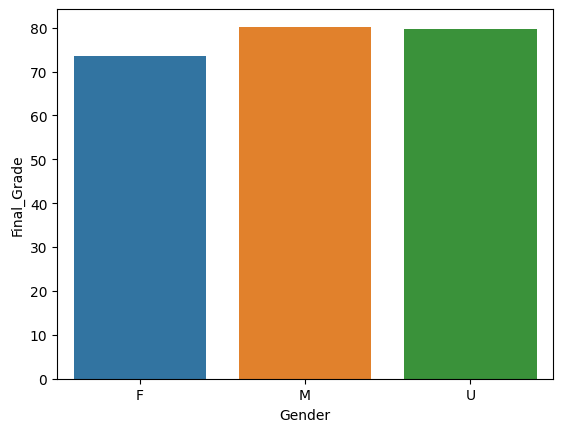

In [40]:
#9
averages = df.groupby('Gender').mean()
sns.barplot(x=averages.index, y='Final_Grade', data=averages)

<ipython-input-43-192c6ba9ec94>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages = df.groupby('Gender').mean()


<Axes: xlabel='Category', ylabel='Average'>

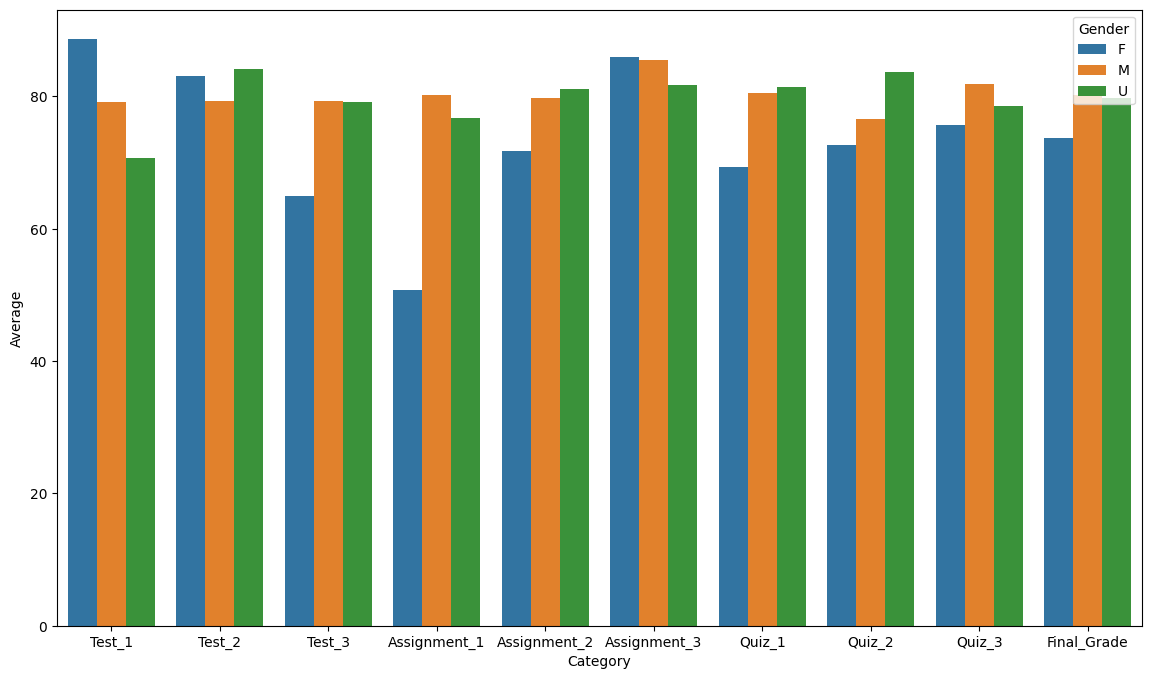

In [43]:
#10
plt.figure(figsize=(14, 8))
averages = df.groupby('Gender').mean()
melteddf = pd.melt(averages.reset_index(), id_vars=['Gender'], var_name='Category', value_name='Average')
sns.barplot(x='Category', y='Average', hue='Gender', data= melteddf)